<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
file_name  = "dataset.csv"

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
#This script reads a CSV file from the given path into a Pandas DataFrame. The first row is treated as headers by default (header=0).

import pandas as pd

# Updated path to the CSV file (assuming it's in the current directory as "dataset.csv")
file_path = 'dataset.csv'  # Change this if your file is in a different location

try:
    # Read the CSV into a DataFrame; the first row is used as column headers by default
    df = pd.read_csv(file_path, header=0)
    print("DataFrame loaded successfully!")  # Optional confirmation
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

<ipython-input-4-648ef060c0f3>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DataFrame loaded successfully!


In [5]:
import pandas as pd

# Assumes df is a pre-loaded DataFrame
# Compute missing value counts per column
missing_counts = df.isnull().sum()

# Identify columns that contain at least one missing value
columns_with_missing = missing_counts[missing_counts > 0].index.tolist()

# Prepare a compact result structure
result = {
    'missing_counts_per_column': missing_counts.to_dict(),
    'columns_with_missing': columns_with_missing
}

# Display results
print("Missing value counts per column:")
print(missing_counts)
print("\nColumns with missing values:")
print(columns_with_missing)

print("\nSummary:")
print(result)

Missing value counts per column:
Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

Columns with missing values:
['Screen_Size_cm', 'Weight_kg']

Summary:
{'missing_counts_per_column': {'Unnamed: 0': 0, 'Manufacturer': 0, 'Category': 0, 'Screen': 0, 'GPU': 0, 'OS': 0, 'CPU_core': 0, 'Screen_Size_cm': 4, 'CPU_frequency': 0, 'RAM_GB': 0, 'Storage_GB_SSD': 0, 'Weight_kg': 5, 'Price': 0}, 'columns_with_missing': ['Screen_Size_cm', 'Weight_kg']}


In [6]:
import pandas as pd

# Assumes df is a pre-loaded DataFrame
# First, check the columns in df to verify
print("Available columns in df:", df.columns.tolist())  # This helps debug

# Replace missing Screen_Size_cm with the most frequent value, if the column exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mode().iloc[0])
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame.")

# Replace missing Weight_kg with the mean value, if the column exists
if 'Weight_kg' in df.columns:
    df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame.")

print("DataFrame processing complete.")

Available columns in df: ['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']
DataFrame processing complete.


In [7]:
# Assuming df is your processed DataFrame
df.to_csv("updated_data.csv", index=False)

In [8]:
print("Available columns in df:", df.columns.tolist())

Available columns in df: ['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']


In [9]:
# Assuming df is already loaded and processed from previous steps

# Check and convert Screen_Size_cm to float if the column exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame.")

# Check and convert Weight_kg to float if the column exists
if 'Weight_kg' in df.columns:
    df['Weight_kg'] = df['Weight_kg'].astype(float)
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame.")

print("Column conversions complete.")

Column conversions complete.


In [10]:
# Assumes df is a pre-loaded DataFrame
# Convert centimeters to inches and create a new column if 'Screen_Size_cm' exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_inch'] = df['Screen_Size_cm'] / 2.54
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame. Skipping conversion.")

# Convert kilograms to pounds and create a new column if 'Weight_kg' exists
if 'Weight_kg' in df.columns:
    df['Weight_pounds'] = df['Weight_kg'] * 2.2046226218
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame. Skipping conversion.")

# Remove the original columns if they exist
columns_to_drop = ['Screen_Size_cm', 'Weight_kg']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Filter for existing columns
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Removed columns: {columns_to_drop}")
else:
    print("No columns to remove.")

print("DataFrame processing complete.")


Removed columns: ['Screen_Size_cm', 'Weight_kg']
DataFrame processing complete.


In [11]:
# Normalize CPU_frequency in place by scaling with the column max
# This updates the existing column without creating a new attribute
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

In [12]:
import pandas as pd

# Assuming df is a pre-loaded DataFrame
# Check if 'Screen' column exists before processing
if 'Screen' in df.columns:
    # Convert 'Screen' into one-hot encoded indicators with names 'Screen_<value>'
    df1 = pd.get_dummies(df['Screen'], prefix='Screen')
    
    # Append the new indicator columns to the original DataFrame
    df = pd.concat([df, df1], axis=1)
    
    # Drop the original 'Screen' column
    df = df.drop(columns=['Screen'])
    print("One-hot encoding and column drop completed successfully.")
else:
    print("Warning: Column 'Screen' does not exist in the DataFrame. Skipping processing.")

print("DataFrame processing complete.")


One-hot encoding and column drop completed successfully.
DataFrame processing complete.


In [13]:
import os
print("Current directory:", os.getcwd())

Current directory: /drive/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/test


In [14]:
# Assuming df is your processed DataFrame
df.to_csv("updated_data.csv", index=False)


In [9]:
import pandas as pd

# Path to the CSV file; header row is used as column names
csv_path = "dataset.csv"

# Read the dataset from the CSV file
df = pd.read_csv(csv_path)

# Generate descriptive statistics for all columns, including object types
description = df.describe(include='all')

# Display the descriptive statistics
print(description.to_string())

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU          OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  Storage_GB_SSD  Weight_pounds        Price Price-binned  Screen-Full_HD  Screen-IPS_panel
count     238.000000  238.000000          238  238.000000  238.000000  238.000000  238.000000        238.000000     238.000000  238.000000      238.000000     238.000000   238.000000          238      238.000000        238.000000
unique           NaN         NaN           11         NaN         NaN         NaN         NaN               NaN            NaN         NaN             NaN            NaN          NaN            3             NaN               NaN
top              NaN         NaN         Dell         NaN         NaN         NaN         NaN               NaN            NaN         NaN             NaN            NaN          NaN          Low             NaN               NaN
freq             NaN         NaN           71         NaN         NaN         Na

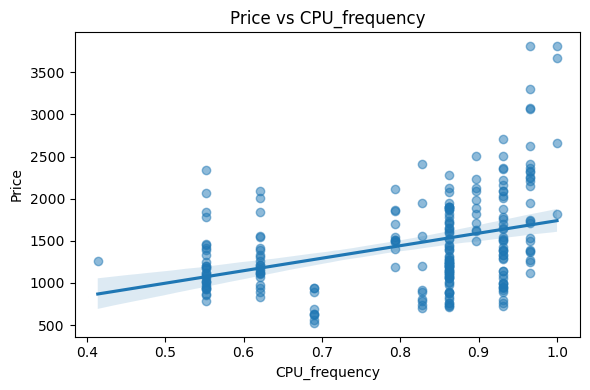

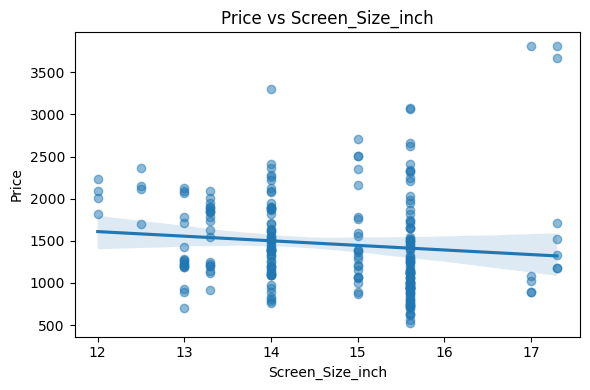

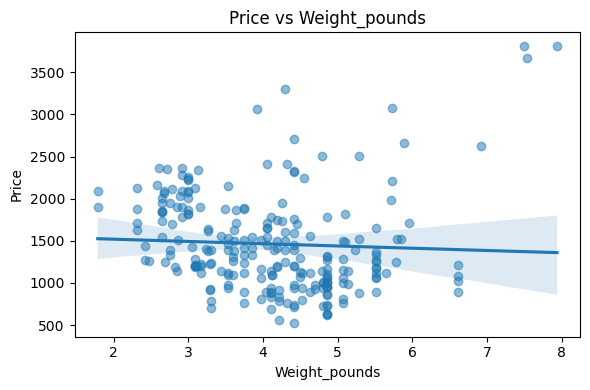

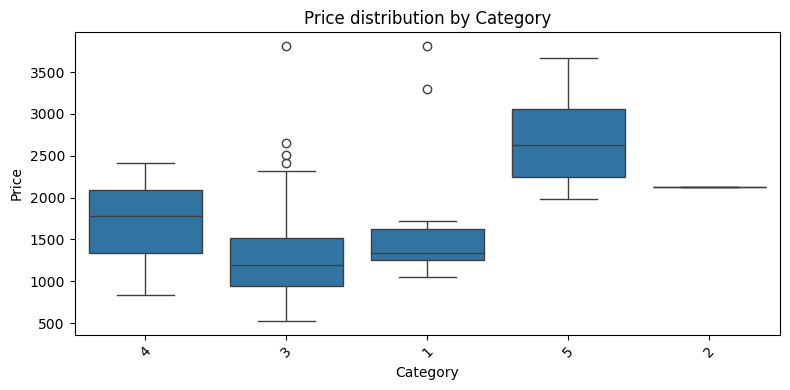

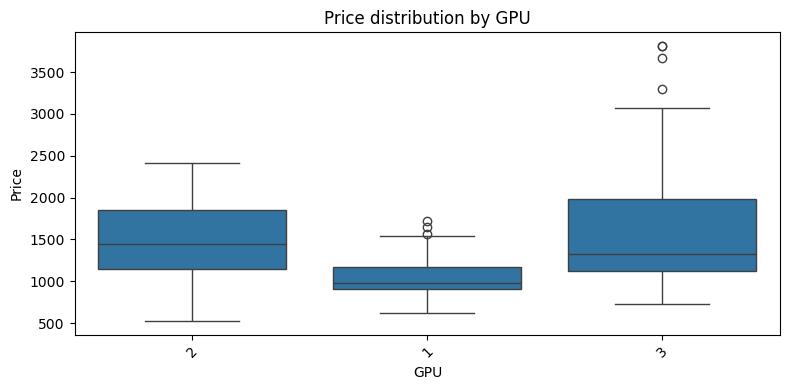

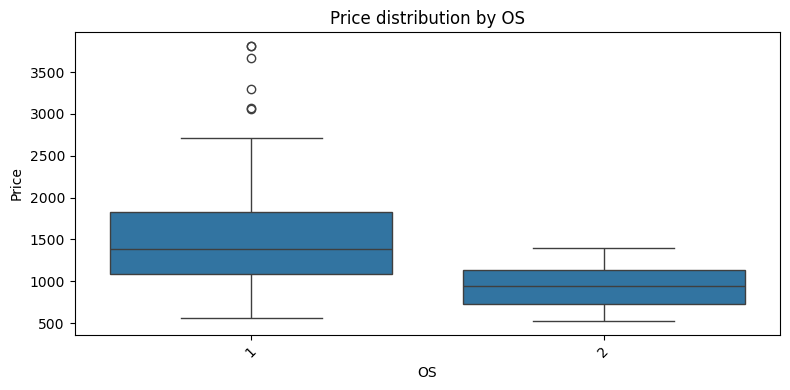

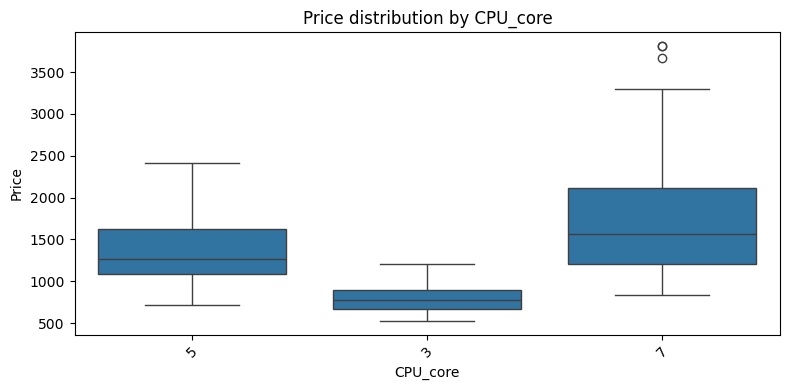

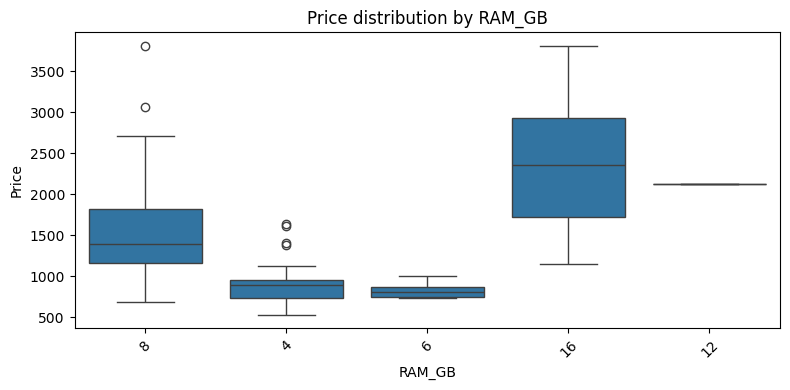

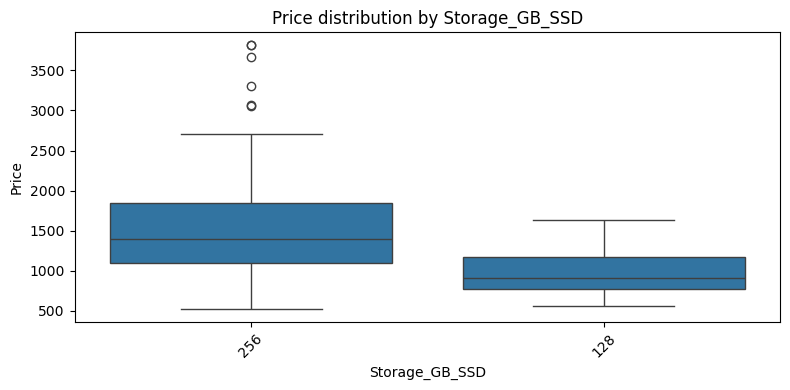

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the CSV file; assumes headers are in the first row
csv_path = "dataset.csv"
df = pd.read_csv(csv_path)

# 1) Regression plots: Price vs each continuous feature
for feature in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=feature, y="Price", data=df, scatter_kws={"alpha": 0.5})
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

# 2) Box plots: Price grouped by categorical attributes
# Cast potential numeric categories to strings to ensure proper boxplot grouping
for col in ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
    df[col] = df[col].astype(str)

for col in ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y="Price", data=df)
    plt.xticks(rotation=45)
    plt.title(f"Price distribution by {col}")
    plt.tight_layout()
    plt.show()

In [13]:
import pandas as pd
from scipy.stats import pearsonr

# Path to the CSV file; headers are assumed to be in the first row
csv_path = "dataset.csv"

df = pd.read_csv(csv_path)

# Identify numeric columns and exclude the target attribute 'Price'
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Price"]

# Compute Pearson correlation coefficient and p-value for each numeric feature against Price
results = []
for col in numeric_cols:
    # Use rows where both the feature and Price are present
    subset = df[[col, "Price"]].dropna()
    r, p = pearsonr(subset[col], subset["Price"])
    results.append({"Attribute": col, "Pearson_r": r, "p_value": p})

# Present results as a single dataframe
results_df = pd.DataFrame(results, columns=["Attribute", "Pearson_r", "p_value"])
print(results_df)

           Attribute  Pearson_r       p_value
0       Unnamed: 0.1   0.321933  3.851058e-07
1         Unnamed: 0   0.321933  3.851058e-07
2           Category   0.286243  7.225696e-06
3                GPU   0.288298  6.166950e-06
4                 OS  -0.221730  5.696643e-04
5           CPU_core   0.459398  7.912950e-14
6   Screen_Size_inch  -0.110644  8.853398e-02
7      CPU_frequency   0.366666  5.502463e-09
8             RAM_GB   0.549297  3.681561e-20
9     Storage_GB_SSD   0.243421  1.489892e-04
10     Weight_pounds  -0.050312  4.397694e-01
11    Screen-Full_HD  -0.021075  7.463568e-01
12  Screen-IPS_panel   0.021075  7.463568e-01


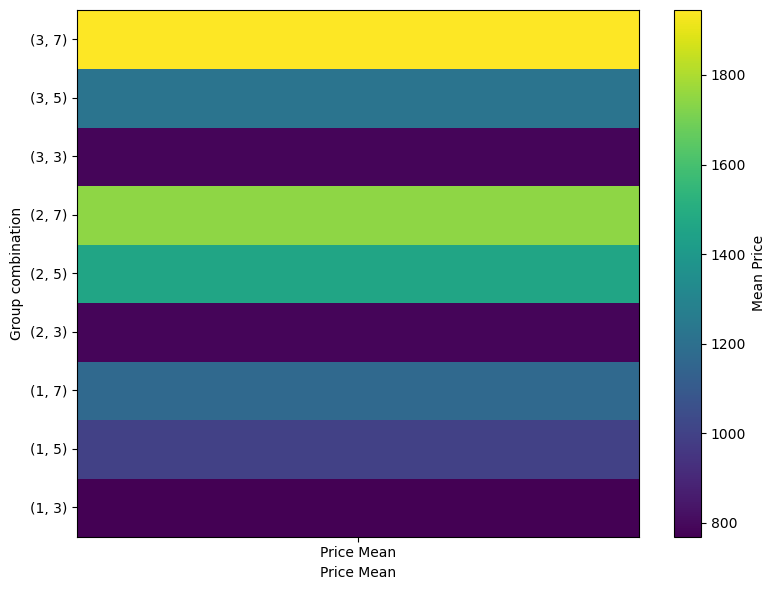

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumes df is a pre-loaded DataFrame containing the columns
# Determine grouping columns that exist in the DataFrame
group_cols = list(set(["GPU", "CPU_core"]) & set(df.columns))

# Create a pivot table with mean Price for combinations of grouping columns
pivot_table = df.pivot_table(index=group_cols, values="Price", aggfunc="mean")

# Plot a pcolor heatmap of the pivot table
fig, ax = plt.subplots(figsize=(8, 6))
mesh = ax.pcolor(pivot_table.values, cmap="viridis")
plt.colorbar(mesh, ax=ax, label="Mean Price")

# Axis labeling
ax.set_ylabel("Group combination")
ax.set_xlabel("Price Mean")

# Set axis ticks to align with the matrix data
ax.set_yticks([i + 0.5 for i in range(pivot_table.shape[0])])
ax.set_yticklabels([str(idx) for idx in pivot_table.index])
ax.set_xticks([0.5])
ax.set_xticklabels(["Price Mean"])

plt.tight_layout()
plt.show()

## Authors


In [36]:
#New environment #Generate plan basic python code without using definition or exceptions or if else statements.Response should be concise.
#Write a Python code that can perform the following tasks.
#1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.2. Print the first 5 rows of the dataframe to verify correct loading.#
import pandas as pd

# Path to the CSV file. Replace with the actual file path.
file_path = 'dataset.csv'

# Read the CSV into a DataFrame. The first row is used as headers by default.
df = pd.read_csv(file_path)

# Print the first five rows to verify correct loading
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [37]:
#Write a Python code that performs the following tasks:
#1. Identify the columns of a data frame with missing values.
#2. Replace the missing values thus identified with mean value of the column.
#3. Deletes the duplicate entries from the data frame.
import pandas as pd
import numpy as np

# Path to the CSV file
file_path = 'dataset.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Identify columns that contain missing values
cols_with_nan = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", cols_with_nan)

# Determine numeric columns among those with missing values
numeric_cols_with_nan = df[cols_with_nan].select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their column means
df[numeric_cols_with_nan] = df[numeric_cols_with_nan].fillna(df[numeric_cols_with_nan].mean())

# Remove duplicate rows
df = df.drop_duplicates()

# Optional: show the first few rows to verify changes
print(df.head())

Columns with missing values: ['tax']
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [38]:
#Write a Python code that identifies the top 5 attributes with highest correlation with the target attribute(Price) in a data frame
import pandas as pd
import numpy as np

# Assume df is your DataFrame and 'target' is the target column name
# Replace 'target' with your actual target column
target = 'price'  # Example: replace with your actual target column name

# Select only numeric columns to avoid errors with non-numeric data
numeric_df = df.select_dtypes(include=[np.number])

# Check if the target column is numeric and exists
if target not in numeric_df.columns:
    print(f"Error: Target column '{target}' is not numeric or does not exist in the DataFrame.")
else:
    # Compute the correlation matrix for numeric columns
    corr_matrix = numeric_df.corr()
    
    # Compute absolute correlations with the target, sort descending
    corr_with_target = corr_matrix[target].abs().sort_values(ascending=False)
    
    # Exclude the target itself and take the top 5 attributes
    top5_features = corr_with_target.drop(labels=[target]).head(5)
    
    print("Top 5 features with highest absolute correlation to the target:")
    print(top5_features)


Top 5 features with highest absolute correlation to the target:
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [39]:
#Write a Python code that counts the number of entries in a dataframe with each unique value of a specific attribute(fuelType).
import pandas as pd

# df is your DataFrame; column_name is the attribute to analyze
column_name = 'fuelType'  # replace with actual column name

# Count occurrences of each unique value in the specified column
# dropna=False includes NaN as a separate category
counts = df[column_name].value_counts(dropna=False)

# Output the counts
print(counts)

# Optional: present as a tidy DataFrame with columns [column_name, 'count']
counts_df = counts.rename_axis(column_name).reset_index(name='count')
print(counts_df)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64
   fuelType  count
0    Petrol  12081
1    Diesel   5706
2    Hybrid     22
3  Electric      2
4     Other      1


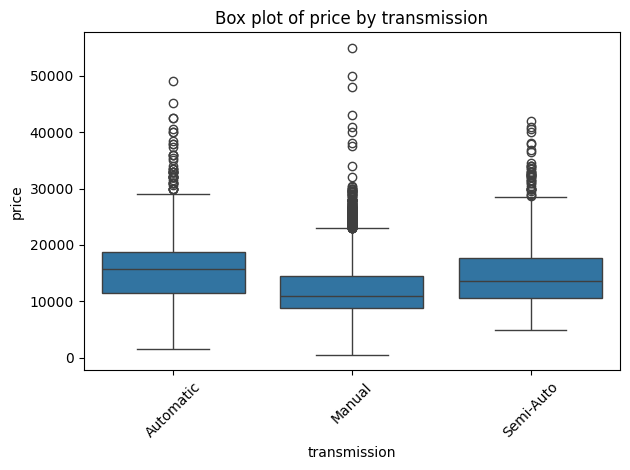

In [40]:
#Write a Python code that creates a Seaborn box plot between a source and target attributes(transmission) of a dataframe.
import seaborn as sns
import matplotlib.pyplot as plt

# Assumes an existing DataFrame named 'df' with columns for the source category and the numeric target
# Replace these with your actual column names
source_col = 'transmission'  # categorical column
target_col = 'price'  # numeric column

# Create a Seaborn box plot: distribution of the target across source categories
sns.boxplot(x=source_col, y=target_col, data=df)

# Improve readability
plt.title(f'Box plot of {target_col} by {source_col}')
plt.xlabel(source_col)
plt.ylabel(target_col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


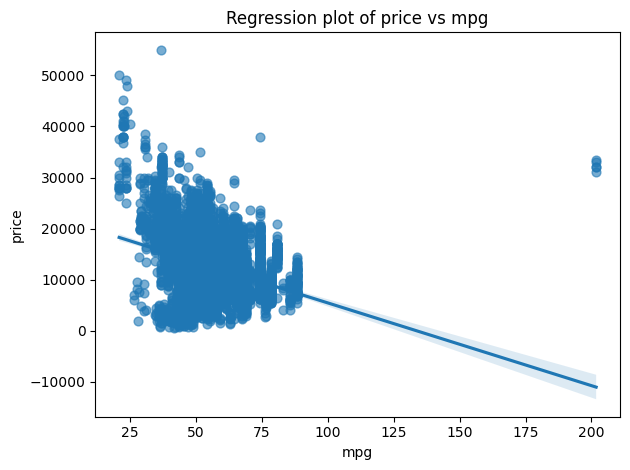

In [41]:
#Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
#Write a Python code that creates a regression plot between a source attribute and a target attribute.
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to plot (adjust to your data)
source_col = 'mpg'  # numeric predictor
target_col = 'price'  # numeric response

# Create a regression plot: scatter with a fitted regression line
sns.regplot(x=source_col, y=target_col, data=df, scatter_kws={'s': 40, 'alpha': 0.6})

plt.title(f'Regression plot of {target_col} vs {source_col}')
plt.xlabel(source_col)
plt.ylabel(target_col)
plt.tight_layout()
plt.show()

In [42]:
#Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
#Write a Python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.
#Write a Python code to fit a linear regression model on a target variable (price) on basis of a source variable(mpg). Calculate the R^2 values and MSE values for this model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume df is a DataFrame with columns 'mpg' (predictor) and 'price' (target)
# Remove rows with missing values in these columns
data = df.dropna(subset=['mpg', 'price'])

# Prepare data for sklearn: X must be 2D, y 1D
X = data[['mpg']].values
y = data['price'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict on training data
y_pred = model.predict(X)

# Metrics
r2 = model.score(X, y)
mse = mean_squared_error(y, y_pred)

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2: {r2:.6f}")
print(f"MSE: {mse:.6f}")

Coefficient (slope): -161.8522929699009
Intercept: 21642.21160307522
R^2: 0.119898
MSE: 19741690.809446


In [43]:
#Fit a linear regression model to predict the price using the following set of features.year, mileage, tax, mpg and engineSize.Calculate the R^2 and MSE values for this model.
#Write a Python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.
#Write a Python code to fit a linear regression model on a target variable(price) on basis of a set of source variables(year, mileage, tax, mpg and engineSize). Calculate the R^2 values and MSE values for this model.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
required_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_col = 'price'

try:
    # Expect a pre-existing DataFrame named 'df'
    _df = df  # You should provide a DataFrame named 'df' with the required columns

    # Validate required columns exist
    for col in required_features + [target_col]:
        if col not in _df.columns:
            raise KeyError(f"Missing required column: {col}")

    # Drop rows with missing values in the required features and target
    data = _df.dropna(subset=required_features + [target_col])

    # Prepare features (X) and target (y)
    X = data[required_features].values  # shape (n_samples, n_features)
    y = data[target_col].values           # shape (n_samples,)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict on training data and evaluate
    y_pred = model.predict(X)
    r2 = model.score(X, y)  # R^2 on training data
    mse = mean_squared_error(y, y_pred)

    # Output results
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"R^2: {r2:.6f}")
    print(f"MSE: {mse:.6f}")
except NameError:
    print("Error: DataFrame named 'df' is not defined. Please provide a DataFrame named 'df'.")
except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print("An unexpected error occurred:", e)

Coefficients: [ 1.21580626e+03 -5.82440184e-02  7.84883721e-01 -8.11703402e+01
  5.34031546e+03]
Intercept: -2441083.776813845
R^2: 0.726538
MSE: 6134065.224382


In [44]:
#For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.
#Write a Python code that can perform the following tasks.
#1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
#2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
#3. Evaluate the R^2 and MSE values for the trained model.
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assumes an existing DataFrame named 'df'
# Define feature columns (source attributes) and the target column
source_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # TODO: replace with your actual feature names
target_col = 'price'  # TODO: replace with your actual target column name

# Create a pipeline: standardize, generate degree-2 polynomial features, then fit linear model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Prepare data
X = df[source_features].values
y = df[target_col].values

# Fit the model
pipeline.fit(X, y)

# Predict on training data
y_pred = pipeline.predict(X)

# Evaluate performance
r2 = pipeline.score(X, y)  # R^2 on training data
mse = mean_squared_error(y, y_pred)

print(f"R^2: {r2:.6f}")
print(f"MSE: {mse:.6f}")

R^2: 0.766662
MSE: 5234038.065463


In [45]:
#For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
#Write a Python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
#3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# df: existing DataFrame with features and a target column
target_col = 'price'  # replace with actual target column name if different
feature_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # specified feature columns

# Check if all specified columns exist
missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the DataFrame: {missing_cols}")
    print("Available columns:", list(df.columns))
else:
    # Convert feature columns to numeric (in case they have strings or mixed types)
    data = df.copy()
    data[feature_cols] = data[feature_cols].apply(pd.to_numeric, errors='coerce')
    
    # Prepare data: drop rows with missing values in used columns
    data = data.dropna(subset=feature_cols + [target_col])
    
    if data.empty:
        print("Error: No data left after dropping missing values.")
    else:
        X = data[feature_cols].values
        y = data[target_col].values
        
        # Split into training and testing sets (20% test size)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Fit Ridge regression with alpha=0.1
        ridge_model = Ridge(alpha=0.1)
        ridge_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = ridge_model.predict(X_test)
        
        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)  # Using r2_score for consistency
        
        print('R^2:', r2)
        print('MSE:', mse)


R^2: 0.6917134446113066
MSE: 6912725.801055086


In [46]:
#Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.
#Write a Python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Apply second degree polynomial scaling to the training and testing data.
#3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
#4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assumes a DataFrame named 'df' with numeric source features and a target column named 'target'
target_col = 'price'  # Replace with your actual target column name

# Use numeric feature columns excluding the target as source features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
source_features = numeric_cols

# Prepare data by dropping rows with missing values in features or target
data = df.dropna(subset=source_features + [target_col])
if data.empty:
    print("Error: No data left after dropping missing values.")
else:
    X = data[source_features].values
    y = data[target_col].values
    
    # Split into training and testing sets (20% test size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features to improve numerical stability
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply second-degree polynomial features to the scaled data
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = pf.fit_transform(X_train_scaled)
    X_test_poly = pf.transform(X_test_scaled)
    
    # Create and fit a Ridge regression model with alpha=0.1
    ridge_model = Ridge(alpha=0.1)
    ridge_model.fit(X_train_poly, y_train)
    
    # Predict on the test data and evaluate
    y_pred = ridge_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Using r2_score for consistency
    
    print('R^2:', r2)
    print('MSE:', mse)


R^2: 0.12127336883388573
MSE: 19703733.909762956


In [47]:
#In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.
#Write a Python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Apply second degree polynomial scaling to the training and testing data.
#3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
#4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# df is an existing DataFrame with numeric features and a target column
target_col = ''  # replace with actual target column name

# Identify numeric feature columns and exclude the target without using conditional statements
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = list(set(numeric_cols) - {target_col})

# Prepare data: drop rows with missing values in features or target
data = df.dropna(subset=feature_cols + [target_col])
X = data[feature_cols].values
y = data[target_col].values

# Split data into training and testing sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: second-degree polynomial features then Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge())
])

# Grid search over Ridge alpha values
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid.fit(X_train, y_train)

# Best estimator from grid search
best_model = grid.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best alpha:', grid.best_params_['ridge__alpha'])
print('R^2:', r2)
print('MSE:', mse)

<class 'KeyError'>: ['']

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
